In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from functools import reduce

def urlToFilename(url):
    return url[url.rfind('/')+1:]

separate_files = [pd.read_csv('./bigCatsCsv/training.csv',header=[0],index_col=0),
                pd.read_csv('./bigCatsCsv/validation.csv',header=[0],index_col=0),
                pd.read_csv('./bigCatsCsv/testing.csv',header=[0],index_col=0)]
files = reduce(lambda a,b : a.append(b),separate_files)
files = files.reset_index(drop=True)
f = lambda a: "./bigCatsEdited/"+str(a.name)+"_"+urlToFilename(a.OriginalURL)
g = lambda a: a.Class
training_dataframes = files.apply([f,g],axis=1)
training_dataframes.columns = ['filepath','class']


idg = ImageDataGenerator(
    rescale=1.0/255)
train_generator = idg.flow_from_dataframe(
    dataframe=training_dataframes,
    x_col='filepath',
    y_col='class',
    image_size=(64, 64)
)
#Note: Some files are missing because they are not available in the downloads
training_dataframes

filepath    ./bigCatsEdited/1001_2440974847_cb8e6b2289_o.jpg
class                                                Cheetah
Name: 1001, dtype: object


,filepath,class
0,./bigCatsEdited/0_12483130855_129962c83e_o.jpg,Leopard
1,./bigCatsEdited/1_11644447156_11e19cf159_o.jpg,Leopard
2,./bigCatsEdited/2_16643949158_a4bb01776c_o.jpg,Leopard
3,./bigCatsEdited/3_18089504933_5ae8770b38_o.jpg,Leopard
4,./bigCatsEdited/4_5546319570_a0a5d37b4b_o.jpg,Leopard
...,...,...
5060,./bigCatsEdited/5060_2097656877_6d5193cca0_o.jpg,Tiger
5061,./bigCatsEdited/5061_12266437605_202e5c98db_o.jpg,Tiger
5062,./bigCatsEdited/5062_3235685295_a19b171818_o.jpg,Tiger
5063,./bigCatsEdited/5063_2825352510_2e09b351a7_o.jpg,Tiger


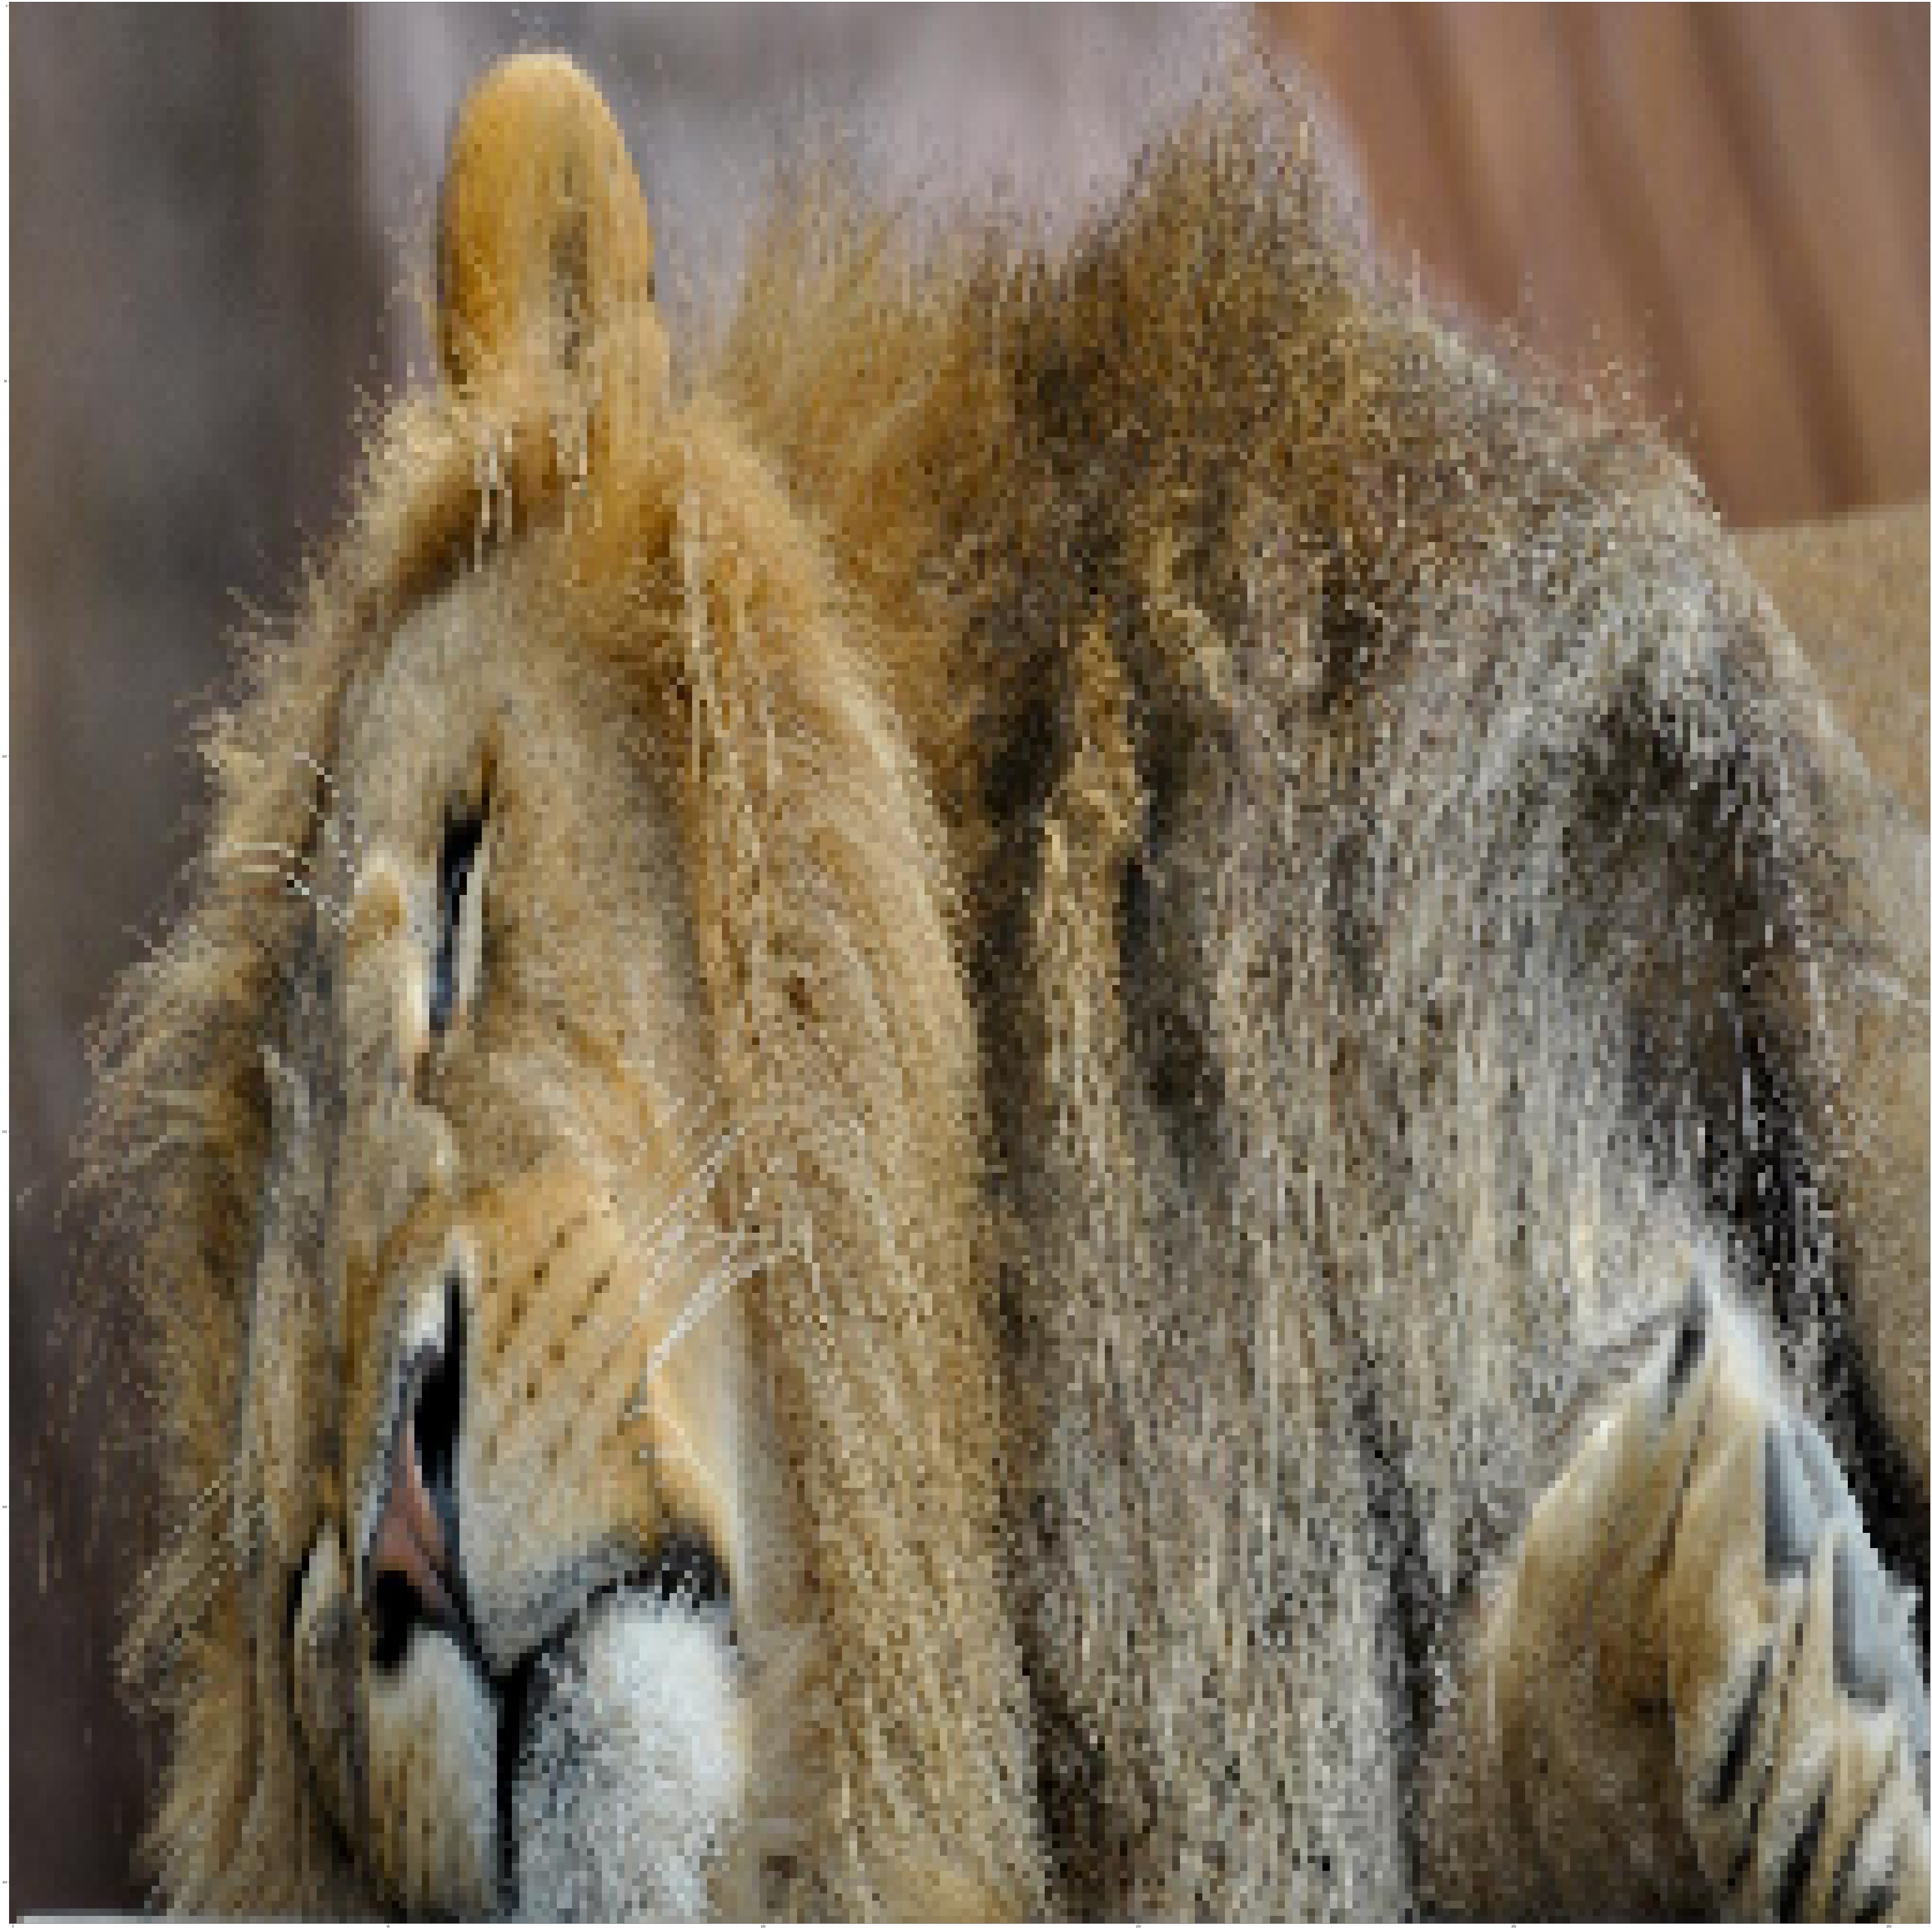

In [15]:
#Look at first picture of the second batch?
img = np.array(train_generator[1][0][0])
plt.figure(figsize=(128,128))
plt.imshow(img)
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

SHAPE = np.array(train_generator[0][0][0]).shape

def build_model():
    model = keras.Sequential([
        layers.Flatten(input_shape=SHAPE),
        layers.Dropout(0.3),
        layers.Dense(103, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(4, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
    
    model.compile(loss=loss,
                optimizer=optimizer,
                metrics=['accuracy'])
    return model

#I trained this model on 
model = build_model()
model.fit(train_generator,epochs=1)



     61/Unknown - 69s 1s/step - loss: 1.3767 - accuracy: 0.3642

KeyboardInterrupt: 